# Procesamiento de datos de Spotify: Reguetón en Colombia

## Introducción 

Este conjunto de datos fue creado a partir de los datos que encontramos en la API de spotify, hicimos un preprocesamiento donde se pudo extraer una base de datos unificada de ciertos artistas del género del reguetón con sus canciones más escuchadas en Colombia. 

el procesamiento de los datos como la extracción de artistas relacionados o las canciones más populares está a cargo del algoritmo interno de Spotify. 



## Import Data


In [1]:
## Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv('artist_related_tracks.csv')


Esta base de datos va a ser utilizada para describir y comparar 

In [3]:
# EDA 
df.head()

,artist_name,artist_popularity,artist_genres,track_name,country,album_name,release_date,audio_features
0,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Sagitario,CO,12 12,2023-08-25,"{'danceability': 0.505, 'energy': 0.688, 'key'..."
1,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Zipcode,CO,12 12,2023-08-25,"{'danceability': 0.849, 'energy': 0.683, 'key'..."
2,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Rulay,CO,12 12,2023-08-25,"{'danceability': 0.894, 'energy': 0.66, 'key':..."
3,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Pangola,CO,12 12,2023-08-25,"{'danceability': 0.68, 'energy': 0.617, 'key':..."
4,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Casa Sola,CO,12 12,2023-08-25,"{'danceability': 0.738, 'energy': 0.692, 'key'..."


In [4]:
# Check summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1693 non-null   object
 1   artist_popularity  1693 non-null   int64 
 2   artist_genres      1693 non-null   object
 3   track_name         1693 non-null   object
 4   country            1693 non-null   object
 5   album_name         1693 non-null   object
 6   release_date       1693 non-null   object
 7   audio_features     1693 non-null   object
dtypes: int64(1), object(7)
memory usage: 105.9+ KB


In [5]:
#Check dictionary of column audio_features
df.audio_features[0]

# String to dictionary

import ast

df['audio_features'] = df['audio_features'].apply(ast.literal_eval)






In [6]:
df.audio_features[0]

{'danceability': 0.505,
 'energy': 0.688,
 'key': 2,
 'loudness': -7.593,
 'mode': 0,
 'speechiness': 0.427,
 'acousticness': 0.659,
 'instrumentalness': 1.13e-06,
 'liveness': 0.876,
 'valence': 0.292,
 'tempo': 102.206,
 'type': 'audio_features',
 'id': '6hb25BscksBk4bZiEH6hEl',
 'uri': 'spotify:track:6hb25BscksBk4bZiEH6hEl',
 'track_href': 'https://api.spotify.com/v1/tracks/6hb25BscksBk4bZiEH6hEl',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6hb25BscksBk4bZiEH6hEl',
 'duration_ms': 209563,
 'time_signature': 4}

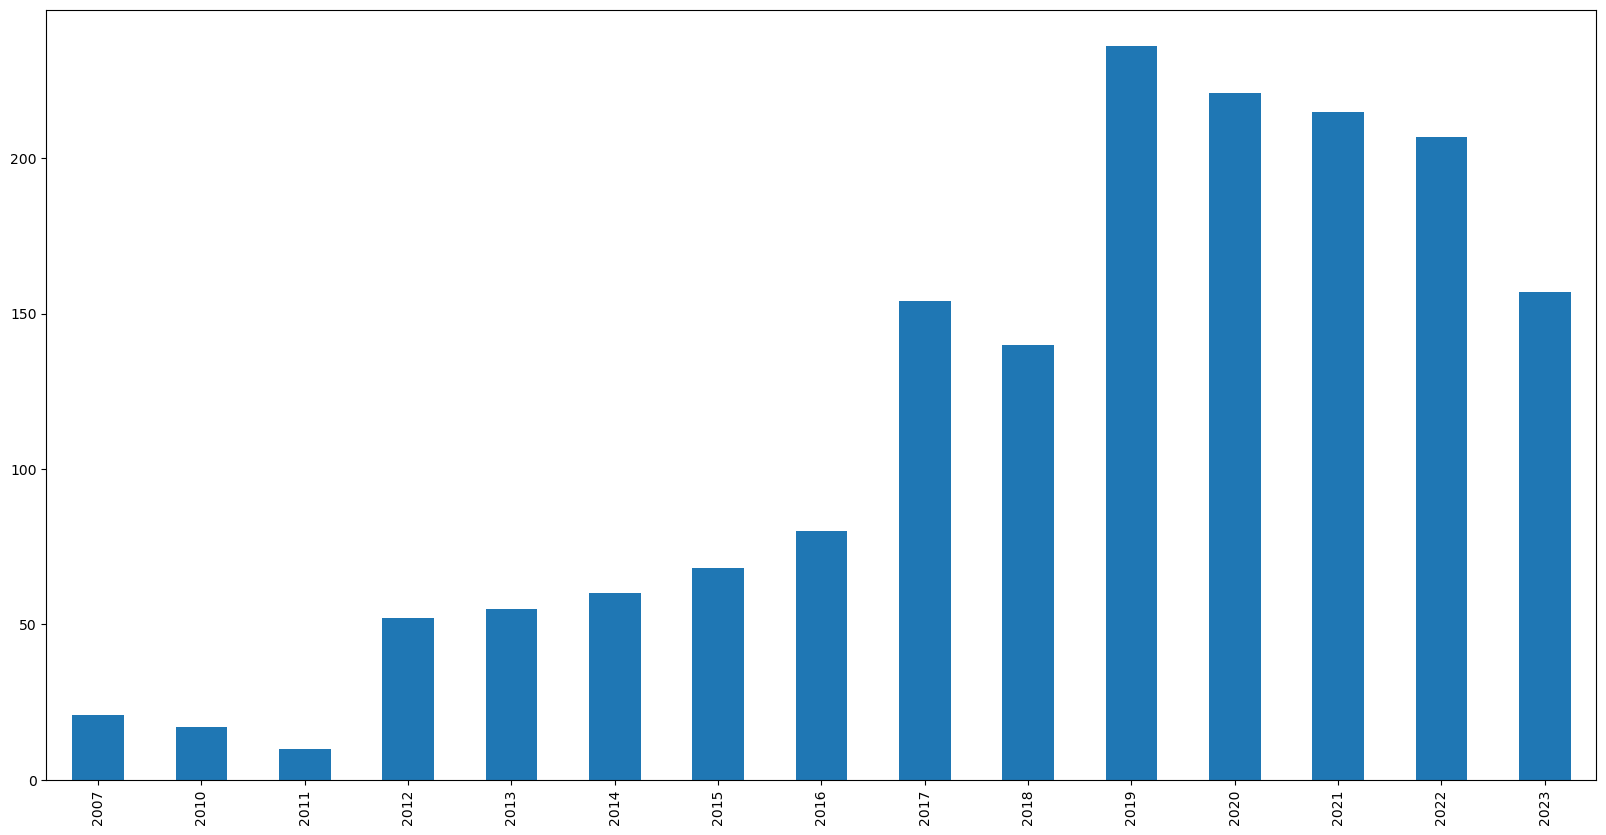

In [7]:
# Release date in format: 2023-08-25
# visualize count of songs per year

# Create new column with year
df['year'] = df['release_date'].str[:4]

# Visualize count of songs per year, sorted by year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.savefig('count_of_songs_per_year1.png')


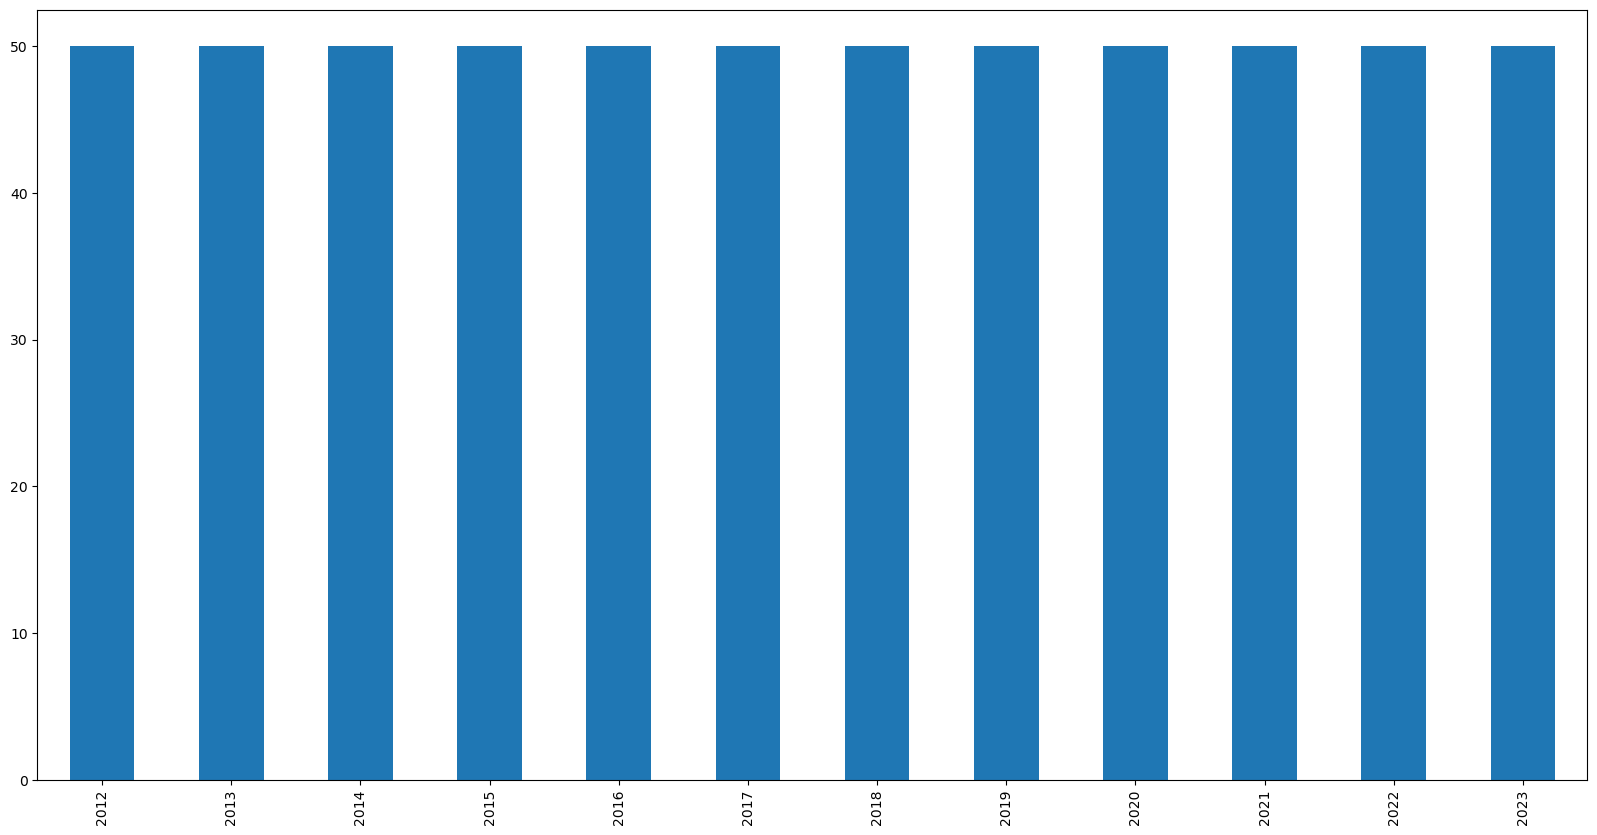

In [8]:
# Beceause of unbalanced data over the years we will only use data from 2012 - 2022
df = df[df['year'] >= '2012']

# Now we will resample our data to get a more balanced dataset, and have only 50 songs per year randomly selected
df = df.groupby('year').apply(lambda x: x.sample(50)).reset_index(drop=True)

# Visualize count of songs per year, sorted by year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Download plot
plt.savefig('count_of_songs_per_year.png')


In [9]:
# Select Audio Features for analysis: 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo'
# For every dict in audio_features, select only the features we want to use

df['danceability'] = df['audio_features'].apply(lambda x: x['danceability'])
df['energy'] = df['audio_features'].apply(lambda x: x['energy'])
df['loudness'] = df['audio_features'].apply(lambda x: x['loudness'])
df['speechiness'] = df['audio_features'].apply(lambda x: x['speechiness'])
df['acousticness'] = df['audio_features'].apply(lambda x: x['acousticness'])
df['instrumentalness'] = df['audio_features'].apply(lambda x: x['instrumentalness'])
df['liveness'] = df['audio_features'].apply(lambda x: x['liveness'])
df['valence'] = df['audio_features'].apply(lambda x: x['valence'])
df['tempo'] = df['audio_features'].apply(lambda x: x['tempo'])

# Drop audio_features column
df.drop('audio_features', axis=1, inplace=True)






In [10]:
df.head(10)

,artist_name,artist_popularity,artist_genres,track_name,country,album_name,release_date,year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Cali Y El Dandee,66,"['colombian pop', 'electro latino', 'latin pop...",Tus Ojos,CO,3 A.M.,2012-01-01,2012,0.601,0.781,-4.347,0.0345,0.0708,0.000000,0.1130,0.657,88.043
1,Cali Y El Dandee,66,"['colombian pop', 'electro latino', 'latin pop...",Besame,CO,3 A.M.,2012-01-01,2012,0.773,0.736,-6.438,0.0363,0.0229,0.000000,0.1680,0.422,108.038
2,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",No Veo La Hora,CO,El Lider 2,2012-08-28,2012,0.718,0.660,-6.626,0.1130,0.1320,0.000136,0.1950,0.793,170.025
3,J Alvarez,67,"['reggaeton', 'urbano latino']",No Me Hagas Esperar,CO,El Imperio Nazza: J. Alvarez Edition,2012-12-18,2012,0.658,0.868,-4.842,0.0621,0.0908,0.000000,0.3350,0.812,92.032
4,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Te Lo Juro por Ti,CO,El Lider 2,2012-08-28,2012,0.849,0.660,-5.668,0.2200,0.1440,0.000000,0.1220,0.888,93.008
5,J Alvarez,67,"['reggaeton', 'urbano latino']",Actua (Remix) [feat. De La Ghetto & Zion],CO,El Imperio Nazza: J. Alvarez Edition,2012-12-18,2012,0.672,0.799,-5.900,0.0700,0.1250,0.000000,0.1420,0.810,167.925
6,Reykon,57,"['reggaeton', 'reggaeton colombiano', 'trap la...",Qué Ha Pa Mí,CO,El Lider 2,2012-08-28,2012,0.806,0.542,-13.011,0.1930,0.3740,0.000000,0.0527,0.970,89.984
7,Cali Y El Dandee,66,"['colombian pop', 'electro latino', 'latin pop...",No Digas Nada,CO,3 A.M.,2012-01-01,2012,0.451,0.738,-5.541,0.0438,0.2970,0.000000,0.0905,0.221,84.343
8,NATTI NATASHA,71,"['latin pop', 'rap latina', 'reggaeton', 'urba...",Gone (feat. Chika),CO,All About Me,2012-03-28,2012,0.735,0.966,-4.574,0.0504,0.1050,0.010300,0.3170,0.632,122.048
9,Cali Y El Dandee,66,"['colombian pop', 'electro latino', 'latin pop...",Yo Te Esperaré,CO,3 A.M.,2012-01-01,2012,0.481,0.810,-5.704,0.1330,0.2340,0.000000,0.0809,0.328,175.697


In [11]:
# Vamos a hacer un reusmen estadistico de las variables numericas
df.describe()


,artist_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,70.320000,0.712543,0.733967,-5.582697,0.118286,0.219512,0.011639,0.180763,0.672118,128.278590
std,8.555091,0.100131,0.127531,1.935486,0.090789,0.176622,0.078040,0.133025,0.187104,37.709906
min,48.000000,0.086600,0.130000,-22.208000,0.028500,0.000021,0.000000,0.030700,0.063400,58.482000
25%,67.000000,0.664000,0.662750,-6.452000,0.056600,0.078375,0.000000,0.095175,0.569750,93.016750
50%,67.000000,0.727000,0.747000,-5.321500,0.084450,0.175000,0.000000,0.127500,0.695000,120.006500
75%,75.000000,0.774250,0.820000,-4.376750,0.148000,0.328250,0.000004,0.240000,0.814000,170.382500
max,85.000000,0.921000,0.989000,-1.766000,0.554000,0.910000,0.866000,0.926000,0.970000,211.974000


/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_29499/1282207546.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


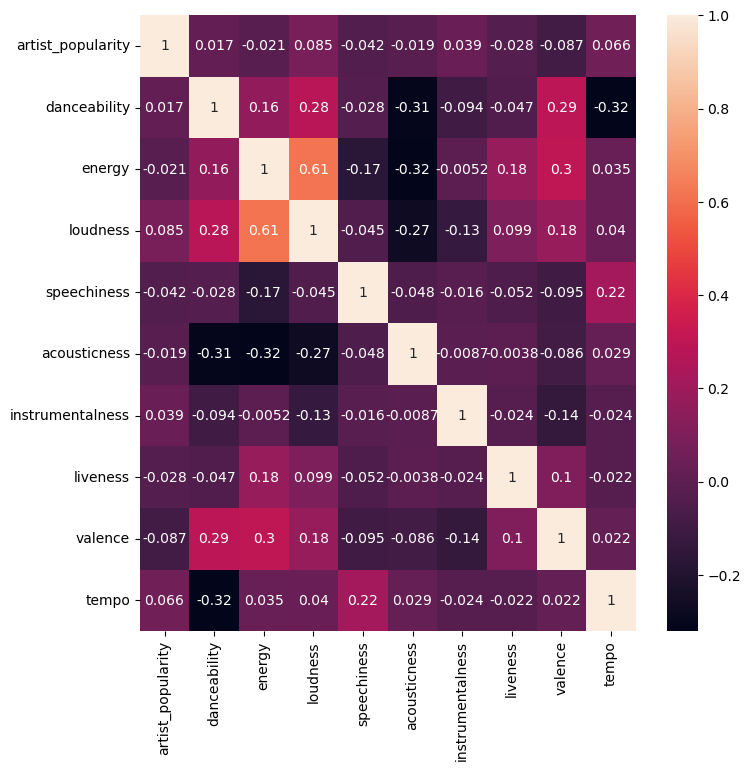

In [12]:
# Visualize correlation between variables

import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.savefig('correlation.png')


En esta gráfica encontramos la correlación entre cada una de las variables de nuestra base de datos, como no estan correlacionadas, cada uno de los datos es importante

In [13]:
# Drop release date  and country
df.drop(['release_date', 'country'], axis=1, inplace=True)


In [14]:
# Group by year and calculate mean of audio features

df_years = df.groupby('year').mean().reset_index()

df_years.head()




/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_29499/803826087.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_years = df.groupby('year').mean().reset_index()


,year,artist_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2012,68.50,0.69466,0.79728,-5.84718,0.091212,0.149961,0.043690,0.229308,0.663060,121.13544
1,2013,72.10,0.70572,0.75720,-6.21636,0.078842,0.236336,0.009995,0.178880,0.728140,126.38332
2,2014,74.06,0.66602,0.75494,-5.41416,0.079746,0.252471,0.005114,0.171696,0.662500,131.16442
3,2015,64.48,0.71780,0.75422,-6.17792,0.096446,0.236637,0.000060,0.174800,0.720280,119.60826
4,2016,69.38,0.71240,0.75056,-5.94372,0.126720,0.288960,0.010282,0.180840,0.687966,139.02306


In [15]:
from sklearn.preprocessing import minmax_scale
import plotly.express as px


features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = MinMaxScaler()

# Drop artist_popularity

df_years.drop('artist_popularity', axis=1, inplace=True)


df_years[features] = scaler.fit_transform(df_years[features])

# Select only 2012 and 2023

df_years = df_years[(df_years['year'] == '2012') | (df_years['year'] == '2023')]

# Reorganizar el DataFrame para Plotly Express
df_radar = df_years.melt(id_vars='year', value_vars=features, var_name='variable', value_name='valor')

# Crear el gráfico de radar
fig = px.line_polar(df_radar, r='valor', theta='variable', line_close=True,
                    color='year', title='Comparación de Variables Normalizadas a lo largo de los Años')
fig.update_traces(fill='toself')

fig.show()

NameError: name 'MinMaxScaler' is not defined